# Multithreaded Python.
* Python is Multi-Threaded but two threads cannot exists at the same time.

Let's dive in:
**Python** is indeed a multi-threaded language, but the behavior of threads in Python, particularly when using the standard **CPython** interpreter, is affected by the **Global Interpreter Lock (GIL)**.

### Global Interpreter Lock (GIL):
- The **GIL** is a **mutex** (or a **lock**) that protects access to Python objects, preventing multiple native threads from executing Python bytecodes at once in CPython.
- This means that even though you can create multiple threads in Python, **`only one thread is allowed to execute Python code`** at any given time. Other threads will be waiting or running in the background, but they can't run Python code simultaneously.
- As a result, **CPU-bound** tasks (which require heavy computations) don’t benefit significantly from threading due to the GIL.
  
However, **I/O-bound** tasks (like **network operations, file I/O**, etc.) can still take advantage of multithreading **`because the GIL is released when performing I/O operations`**. This allows multiple threads to run concurrently while waiting for I/O operations to complete.

### Multithreading in Python:
1. **Threading** is useful for I/O-bound applications, where you can create threads to perform tasks like reading/writing files, network requests, etc., simultaneously.
2. **Multiprocessing** is a better option for CPU-bound tasks because it runs processes in parallel, bypassing the GIL by using multiple interpreters.


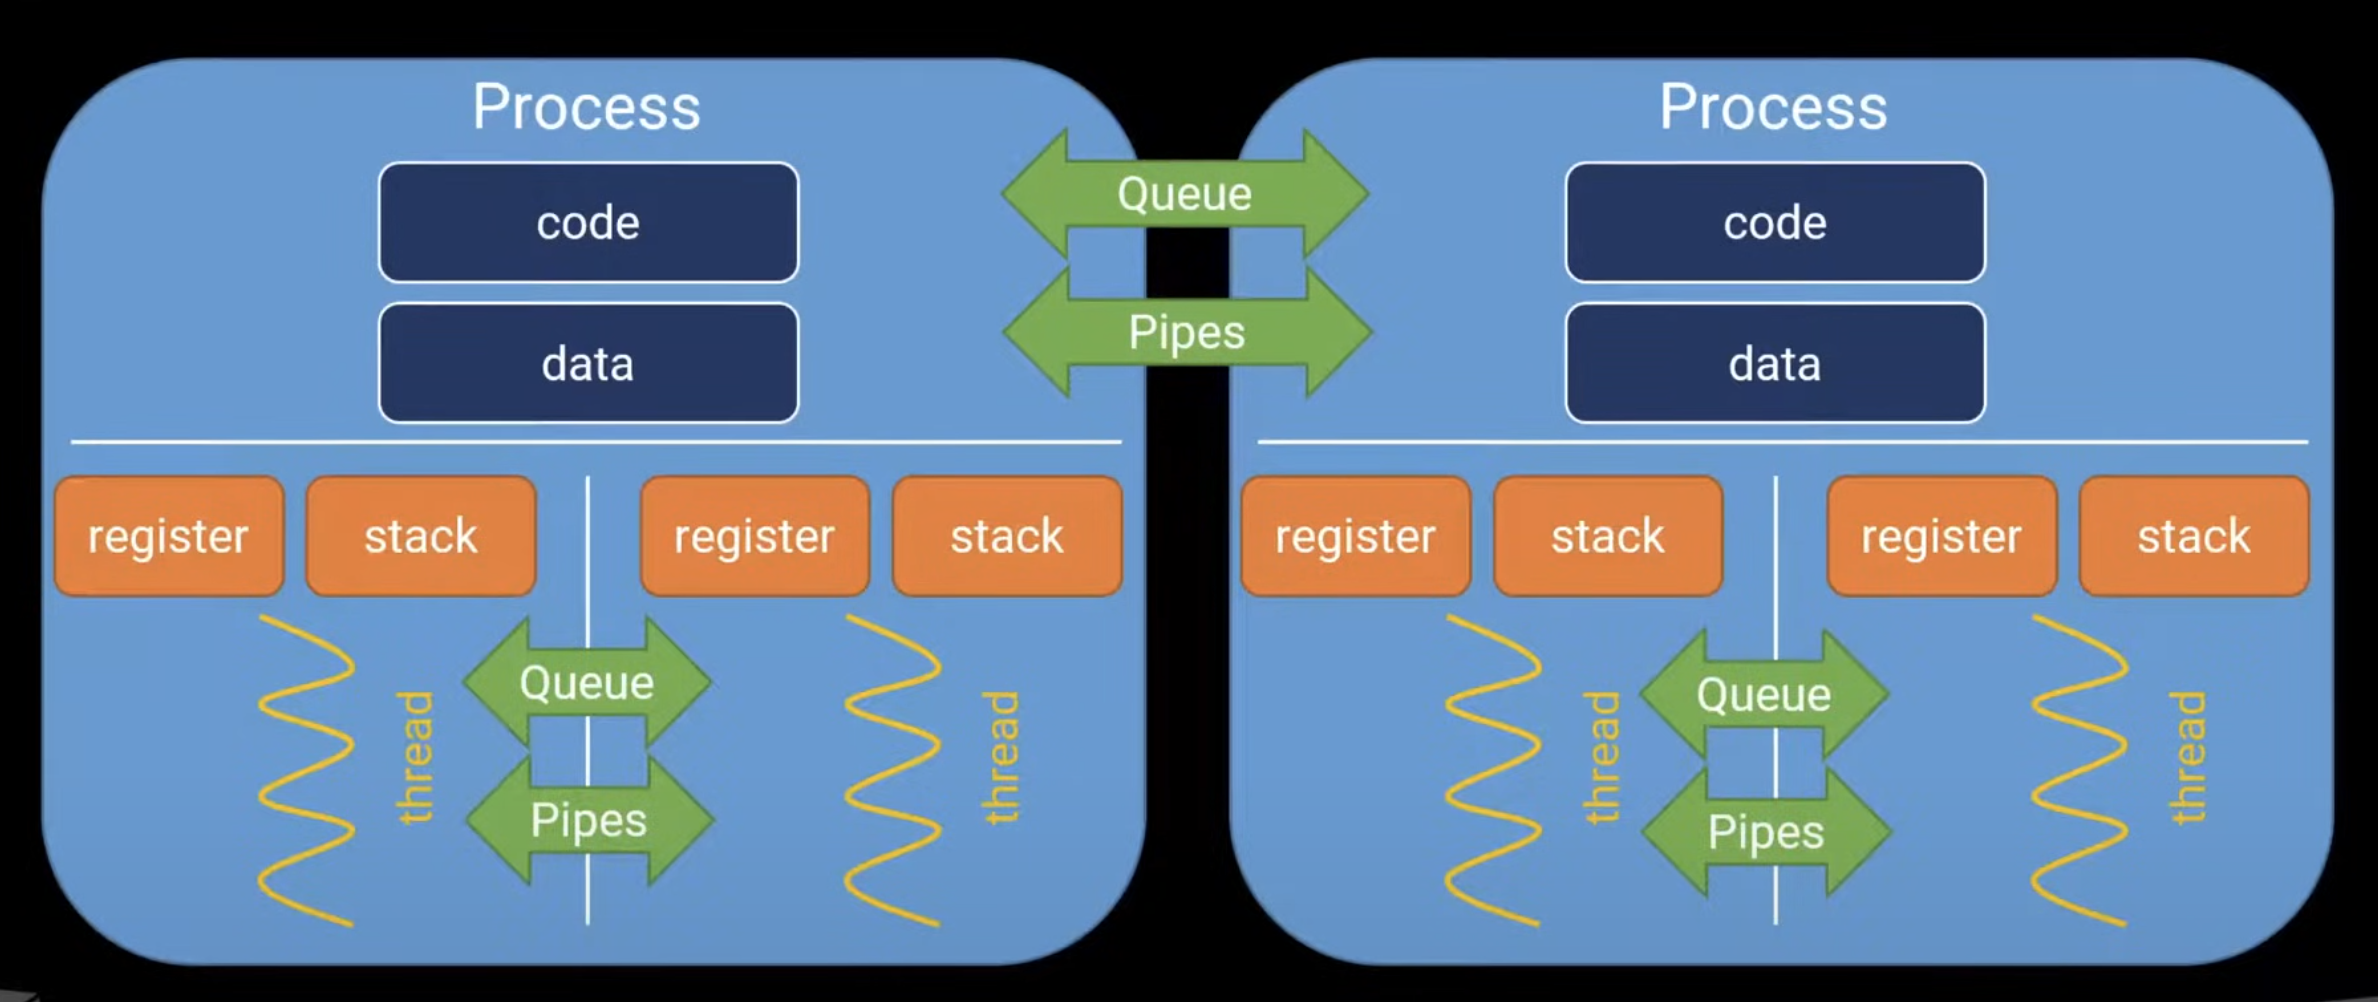

Here’s a structured note focusing on the resource provided:

---

### **Introduction to Concurrent Programming**

#### 1. **Overview and Objectives**
   - **Introduction**: This module introduces concurrent programming, including its benefits, use cases, and considerations.
   - **Goals**:
     - Learn why concurrency is beneficial.
     - Explore different types of concurrent programming, including multi-threading and multi-processing.
     - Understand important considerations such as thread safety, the Global Interpreter Lock (GIL), and race conditions.

#### 2. **Sequential vs. Concurrent Programming**
   - **Sequential Programming**:
     - Programs run tasks one after another.
     - Usually run on a single CPU, under-utilizing available computing resources, especially on machines with multiple cores.
   - **Concurrent Programming**:
     - Tasks can run concurrently, maximizing the use of multi-core systems.
     - For instance, in a program calculating multiple metrics, tasks can be distributed across multiple CPU cores simultaneously rather than sequentially.

#### 3. **Types of Concurrent Programming**
   - **Multi-threading**:
     - Multiple threads can run concurrently within a single process on one core.
     - Useful for I/O-bound tasks like waiting for network responses (e.g., API requests, web scraping).
     - Threads switch execution when one is idle, allowing others to perform operations.
     - While one thread waits for I/O, another can be running, maximizing CPU usage without true parallelism.
   - **Multi-processing**:
     - Multiple processes can run on different CPU cores simultaneously.
     - Useful for CPU-bound tasks that require intensive computations.
     - Each process has its own memory space and Python interpreter, avoiding issues like race conditions.

#### 4. **I/O-bound vs. CPU-bound Tasks**
   - **I/O-bound tasks**:
     - Programs spend most of their time waiting for data, such as network communication or file/database I/O.
     - Threads can be used to handle multiple I/O-bound operations concurrently, reducing idle waiting time.
   - **CPU-bound tasks**:
     - Programs are bottlenecked by computation-heavy tasks.
     - Multi-processing can leverage multiple cores to execute CPU-bound operations in parallel, speeding up the process.

#### 5. **The Global Interpreter Lock (GIL)**
   - **What is the GIL?**
     - Python’s Global Interpreter Lock ensures that only one thread can execute Python bytecode at a time.
     - This makes Python multi-threaded but not simultaneously multi-threaded.
     - Threads take turns running, which impacts performance for CPU-bound tasks but has less effect on I/O-bound tasks.
   - **Implication**:
     - While multiple threads can be created, true parallelism is only achievable with multi-processing.

#### 6. **Thread Safety and Race Conditions**
   - **Thread Safety**:
     - Threads in a program share the same memory space, so special care is required to ensure threads do not interfere with each other.
     - **Locks** can be used to manage access to shared data, preventing simultaneous modifications that lead to unpredictable behavior.
   - **Race Conditions**:
     - Occurs when two or more threads access and modify the same variable concurrently, leading to inconsistent or unpredictable results.
     - Example: If two threads read and modify a shared variable at the same time, the final result might not reflect the expected modifications from both threads.

#### 7. **Considerations for Multi-threading vs. Multi-processing**
   - **Multi-threading**:
     - Suitable for I/O-bound tasks where the program spends time waiting for data rather than performing computations.
     - Threads share the same memory, so care must be taken to avoid race conditions and ensure thread safety.
     - Some overhead exists due to switching between threads, but it’s generally less than for processes.
   - **Multi-processing**:
     - Ideal for CPU-bound tasks where intense computations are distributed across multiple cores.
     - Each process has its own memory and interpreter, reducing risks like race conditions but increasing memory overhead.
     - There’s more overhead in managing and communicating between processes.

#### 8. **Asynchronous Programming**
   - **Asynchronous I/O**:
     - An alternative to multi-threading where network or file I/O requests are initiated without waiting for the response.
     - The program can continue with other tasks while waiting for acknowledgments (e.g., database writes).
     - Once an acknowledgment is received, the program picks up where it left off, improving efficiency.

#### 9. **When to Use Concurrency**
   - **When it makes sense**:
     - Use concurrency for tasks that can be performed in parallel, such as computing independent metrics, waiting for network I/O, or handling user interactions in a GUI.
   - **When to avoid it**:
     - Not every program requires concurrency. For simple or single-threaded tasks, sequential programming might be sufficient.
   - **Trade-offs**:
     - Concurrency adds complexity to programming and debugging.
     - Writing concurrent programs requires careful consideration of thread safety, locking, and race conditions, and it introduces overhead in thread and process management.

---

### **Conclusion**
- **Concurrency** is a powerful tool for improving the efficiency of Python programs by utilizing multiple cores or handling I/O-bound operations effectively.
- While **multi-threading** is great for I/O-bound tasks, **multi-processing** excels at CPU-bound tasks.
- However, concurrency adds complexity, so it's important to evaluate whether it’s worth the added complexity for a given program.

---

This note covers the key points from the explanation, focusing on the resource's content. Would you like to refine or expand on any specific part?

In [9]:
import time


def calculate_sum_squares(numbers):
    sum = 0
    for i in range(numbers):
        sum += i**2
    print(sum)


def sleep_a_little(seonds):
    time.sleep(seonds)


def main() -> None:
    start = time.perf_counter()
    for i in range(5):
        calculate_sum_squares((i + 1) * 1000000)

    end = time.perf_counter()
    print(f"Time taken by calculate_sum_squares: {end - start:.6f} seconds")

    for i in range(1, 6):
        sleep_a_little(i)

    end = time.perf_counter()
    print(f"Time taken by sleep_a_little: {end - start:.6f} seconds")


if __name__ == "__main__":
    main()

333332833333500000
2666664666667000000
8999995500000500000
21333325333334000000
41666654166667500000
Time taken by calculate_sum_squares: 2.007677 seconds
Time taken by sleep_a_little: 17.023150 seconds


In [12]:
import time
import threading


def calculate_sum_squares(numbers):
    sum = 0
    for i in range(numbers):
        sum += i**2
    print(sum)


def sleep_a_little(seonds):
    time.sleep(seonds)


def main() -> None:
    start = time.perf_counter()

    current_threads = []
    for i in range(5):
        maximum_value = (i + 1) * 1000000
        t = threading.Thread(target=calculate_sum_squares, args=(maximum_value,))
        t.start()
        current_threads.append(t)

    for i in range(len(current_threads)):
        current_threads[i].join()

    end = time.perf_counter()
    print(f"Time taken by calculate_sum_squares: {end - start:.6f} seconds")

    start = time.perf_counter()
    current_threads = []
    for second in range(1, 6):
        t = threading.Thread(target=sleep_a_little, args=(second,))
        t.start()
        current_threads.append(t)

    for i in range(len(current_threads)):
        current_threads[i].join()

    end = time.perf_counter()
    print(f"Time taken by sleep_a_little: {end - start:.6f} seconds")


if __name__ == "__main__":
    main()

333332833333500000
2666664666667000000
8999995500000500000
21333325333334000000
41666654166667500000
Time taken by calculate_sum_squares: 1.955016 seconds
Time taken by sleep_a_little: 5.005700 seconds
